[*********************100%***********************]  10 of 10 completed
<ipython-input-1-1209f7e835c0>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Return (%)', data=report_df, palette="viridis", ax=ax1)


Returns for 2025-02-07:
Ticker Return (%)
  NVDA     0.9015
  META     0.3553
     V     0.1554
   JPM    -0.3973
 BRK-B    -0.9388
  MSFT    -1.4598
  AAPL    -2.3969
 GOOGL    -3.2672
  TSLA    -3.3928
  AMZN    -4.0531


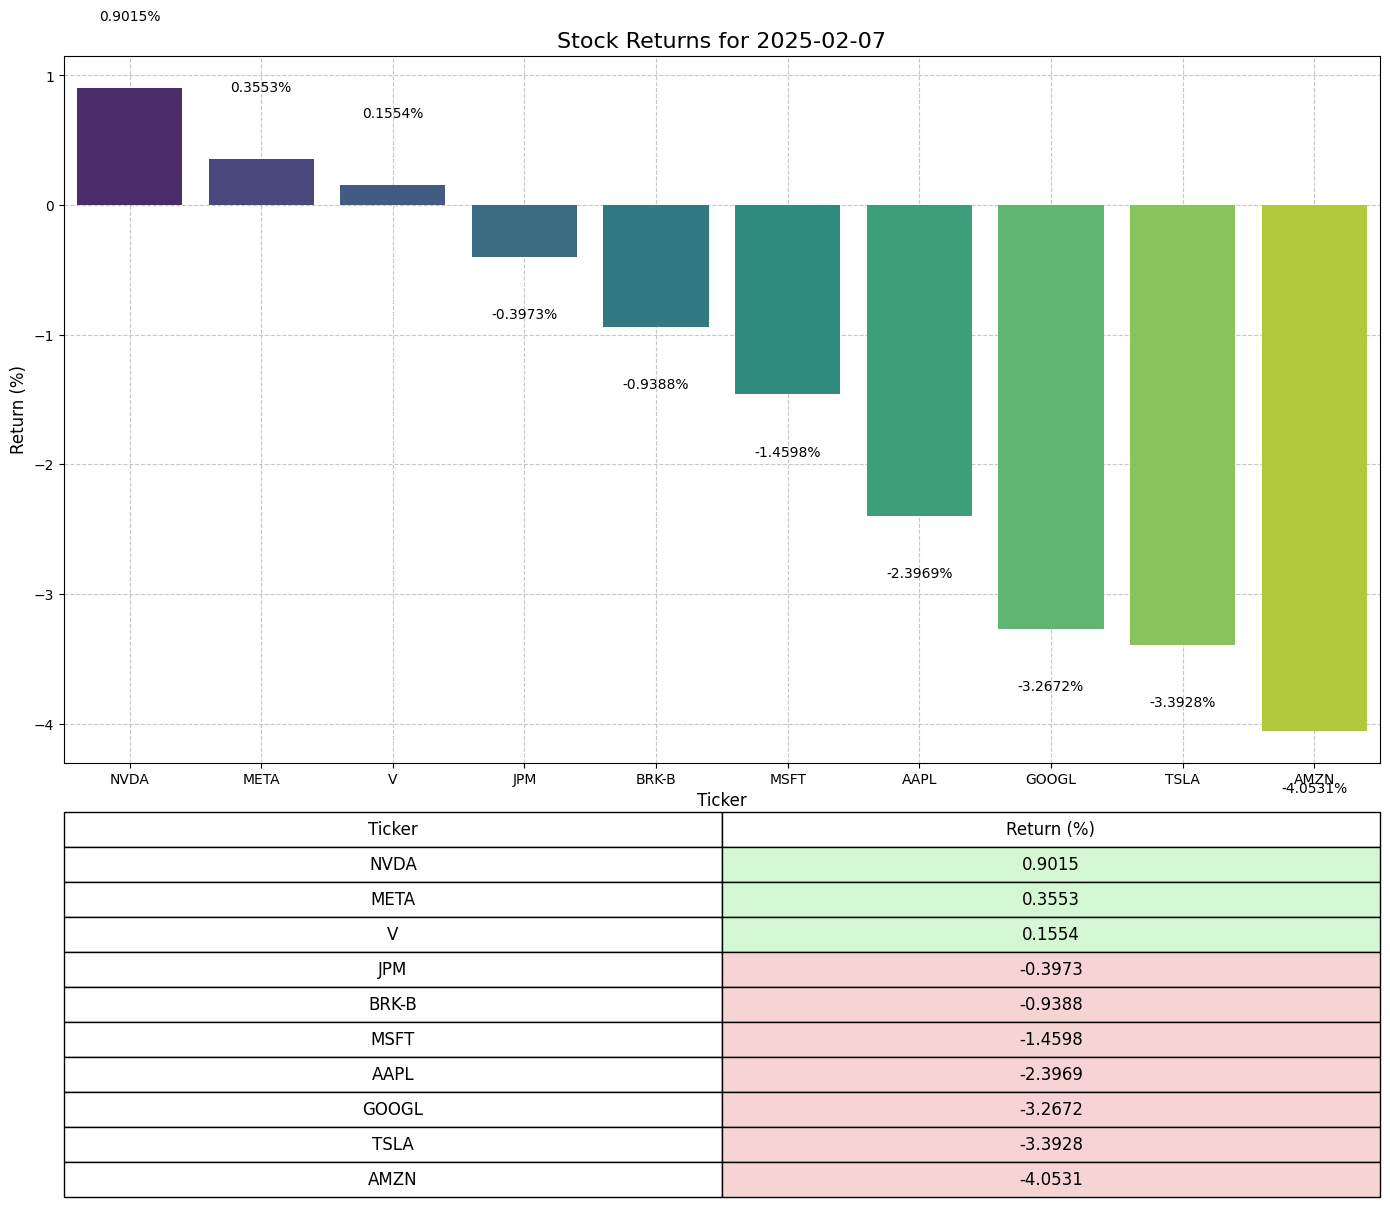

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Define tickers for the 10 biggest stocks (by market cap)
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'V']

# Get today's date
today = datetime.date.today()

# Download data for the past 10 days to ensure capturing the last trading day (even over weekends/holidays)
end_date = today.strftime("%Y-%m-%d")
start_date = (today - datetime.timedelta(days=10)).strftime("%Y-%m-%d")

# Download daily adjusted close data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Close']

# Compute daily returns (percentage change)
daily_returns = data.pct_change().dropna() * 100

# Get returns for the last available trading day
prev_returns = daily_returns.iloc[-1]
last_date = daily_returns.index[-1]

# Create a DataFrame from the returns and sort by return (highest first)
report_df = pd.DataFrame({
    'Ticker': prev_returns.index,
    'Return (%)': prev_returns.values
})
# Round the returns to 4 decimals
report_df['Return (%)'] = report_df['Return (%)'].round(4)
report_df = report_df.sort_values(by='Return (%)', ascending=False)

# Print a nicely formatted table to the console
print(f"Returns for {last_date.date()}:")
print(report_df.to_string(index=False, formatters={'Return (%)': '{:.4f}'.format}))

# Create a figure with two subplots: the top for the bar chart, the bottom for the table
# Increased figure size and adjusted height ratios to ensure clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [4, 1]})

# --- Bar Chart ---
sns.barplot(x='Ticker', y='Return (%)', data=report_df, palette="viridis", ax=ax1)
ax1.set_title(f"Stock Returns for {last_date.date()}", fontsize=16)
ax1.set_xlabel("Ticker", fontsize=12)
ax1.set_ylabel("Return (%)", fontsize=12)

# Ensure gridlines appear behind the bars and add gridlines for clarity
ax1.set_axisbelow(True)
ax1.grid(True, which='both', linestyle='--', alpha=0.7)

# Add data labels on top of each bar with 4 decimal places
for patch in ax1.patches:
    height = patch.get_height()
    ax1.text(
        patch.get_x() + patch.get_width() / 2,
        height + (0.5 if height >= 0 else -0.5),
        f'{height:.4f}%',
        ha='center', va='bottom', fontsize=10, color='black'
    )

# --- Table ---
ax2.axis('off')
table = ax2.table(cellText=report_df.values,
                  colLabels=report_df.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Color-code the "Return (%)" column cells: green for positive, red for negative returns.
for key, cell in table.get_celld().items():
    # Process only non-header rows and the "Return (%)" column (column index 1)
    if key[0] > 0 and key[1] == 1:
        try:
            value = float(cell.get_text().get_text().replace('%', ''))
            if value >= 0:
                cell.set_facecolor('#d4f7d4')  # light green for positive returns
            else:
                cell.set_facecolor('#f7d4d4')  # light red for negative returns
        except Exception:
            pass

# Adjust the spacing between subplots to avoid any overlap
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()
